### Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data : 

In [2]:
Dataset = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
Dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
Dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Data Preprocessing : 

In [5]:
Dataset = Dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [6]:
Dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
Dataset = Dataset.rename(columns = {'v1':'Label','v2':'Message'})

In [8]:
Dataset.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
Dataset.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
Dataset.isnull().sum()

Label      0
Message    0
dtype: int64

In [12]:
Dataset['Message_Length'] = Dataset['Message'].apply(len)
Dataset.head()

,Label,Message,Message_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Visualizing Data : 

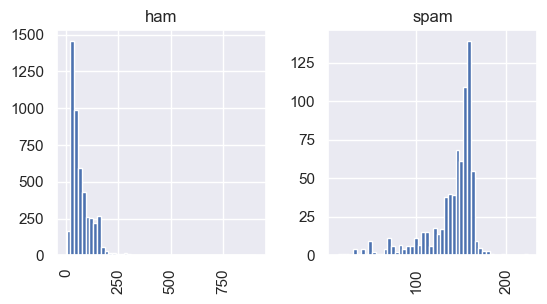

In [13]:
sns.set_theme(style="darkgrid")
Dataset.hist(column='Message_Length', by='Label', bins=50, figsize=(6,3))
plt.show()

### Encoding The Data : 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE = LabelEncoder()

In [16]:
columns = ['Label','Message']

In [17]:
X = Dataset.copy()

In [18]:
X

,Label,Message,Message_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [19]:
for column in columns:
    X[column] = LE.fit_transform(X[column])

In [20]:
X.head()

,Label,Message,Message_Length
0,0,1079,111
1,0,3101,29
2,1,1000,155
3,0,4088,49
4,0,2757,61


In [21]:
Y = X['Label']

In [22]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int32

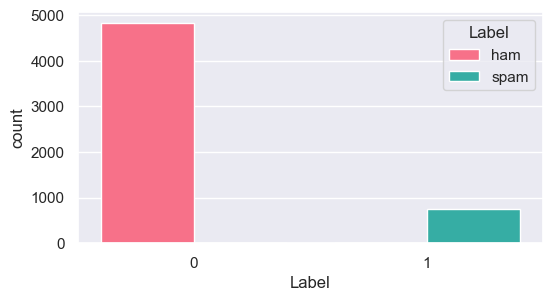

In [23]:
plt.figure(figsize = (6,3))
sns.countplot(x=Y,palette = "husl",hue=Dataset['Label'],saturation=1)
plt.show()

### Text Vectorizing :

In [24]:
Dataset['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [25]:
Text_Feature = Dataset['Message'].copy()

In [26]:
Text_Feature

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

### Removing Stopwords & Punctuation :

In [27]:
import string
from nltk.corpus import stopwords

In [28]:
def Text_Process(Text):
    Text = Text.translate(str.maketrans('', '', string.punctuation))
    Text = [word for word in Text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(Text)

In [29]:
Text_Feature = Text_Feature.apply(Text_Process)

In [30]:
Text_Feature

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: Message, Length: 5572, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
Vectorizer = TfidfVectorizer()

In [33]:
Features = Vectorizer.fit_transform(Text_Feature)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Dataset['Label'], test_size=0.2, random_state=0)

In [36]:
from sklearn.svm import SVC

In [37]:
SV_Classifier = SVC(kernel='sigmoid', gamma=1.0)

In [38]:
SV_Classifier.fit(X_train, Y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
Y_Pred = SV_Classifier.predict(X_test)

In [41]:
Y_Pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [42]:
CM = confusion_matrix(Y_test,Y_Pred)

In [43]:
CM

array([[949,   0],
       [166,   0]], dtype=int64)

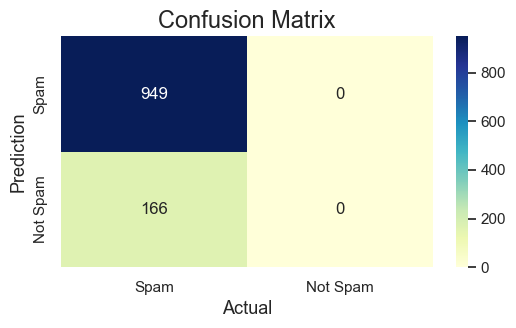

In [44]:
plt.figure(figsize = (6,3))
sns.heatmap(CM,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [45]:
accuracy = accuracy_score(Y_test, Y_Pred)
print(accuracy)

0.8511210762331839
